In [132]:
%matplotlib inline

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_read = pd.read_csv(city_data_to_load)
ride_read = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
crm = pd.merge(
    city_read, ride_read, on="city", how="left", suffixes=("_city", "_ride"))
# Display the data table for preview
d = crm[["city", "date", "fare", "ride_id", "driver_count", "type"]]
d.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


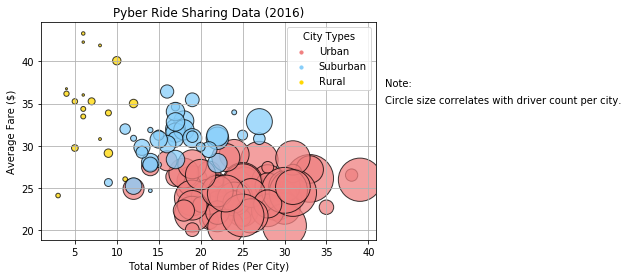

In [150]:
 # Obtain the x and y coordinates for each of the three city types
dx = d.groupby(["city", "type"]).count()
dx = dx.reset_index()
dx = dx.set_index("city")
dy = d.groupby(["city", "type"]).mean()
dy = dy.reset_index()
dy = dy.set_index("city")
ds = d.groupby(["city", "type"]).sum()
ds = ds.reset_index()
ds = ds.set_index("city")
#RURAL
rx = dx.loc[dx["type"] == "Rural"]["ride_id"]
ry = round(dy.loc[dy["type"] == "Rural"]["fare"], 2)
rs = ds.loc[ds["type"] == "Rural"]["driver_count"]
ux = dx.loc[dx["type"] == "Urban"]["ride_id"]
uy = round(dy.loc[dy["type"] == "Urban"]["fare"], 2)
us = ds.loc[ds["type"] == "Urban"]["driver_count"]
sx = dx.loc[dx["type"] == "Suburban"]["ride_id"]
sy = round(dy.loc[dy["type"] == "Suburban"]["fare"], 2)
ss = ds.loc[ds["type"] == "Suburban"]["driver_count"]

# Build the scatter plots for each city types
plt.scatter(ux, uy, marker="o", facecolors="lightcoral", edgecolors="black", alpha=.75, s=us)
plt.scatter(sx, sy, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=.75, s=ss)
plt.scatter(rx, ry, marker="o", facecolors="gold", edgecolors="black", alpha=.75, s=rs)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend

#plt.legend(title = "City Types", loc="best")

# Incorporate a text label regarding circle size
ul = plt.scatter([],[], s=10, marker = "o", color = "lightcoral")
sl = plt.scatter([],[], s=10, marker = "o", color = "lightskyblue")
rl = plt.scatter([],[], s=10, marker = "o", color = "gold")
plt.legend((ul, sl, rl), ("Urban", "Suburban", "Rural"), loc='best', title="City Types")
plt.grid(True)
plt.text(42,37, "Note:")
plt.text(42,35, "Circle size correlates with driver count per city.")
# Save Figure
plt.savefig("Images/PyberRideSharingData.png")

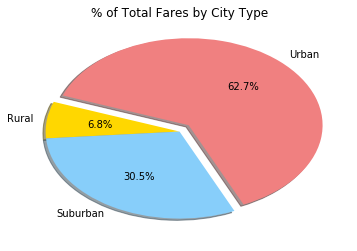

In [174]:
# Calculate Type Percents
p = d.groupby(["type"]).sum()
explode = (0, 0, 0.1)
City_Types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
percents = p["fare"]/p["fare"].sum()
# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(percents, explode=explode, labels=City_Types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Save Figure
plt.savefig("Images/TotalFares.png")

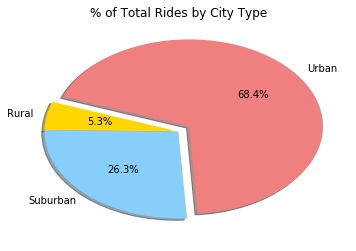

In [176]:
# Calculate Type Percents
p = d.groupby(["type"]).count()
explode = (0, 0, 0.1)
City_Types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
rides = p["ride_id"]/p["ride_id"].sum()
# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(rides, explode=explode, labels=City_Types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Save Figure
plt.savefig("Images/TotalRides.png")

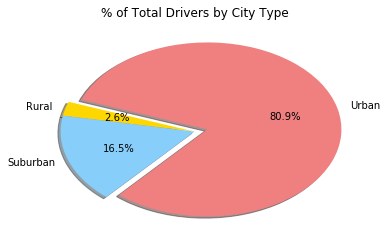

In [179]:
# Calculate Type Percents
d =crm.drop_duplicates(["city"])
p = d.groupby(["type"]).sum()
explode = (0, 0, 0.1)
City_Types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
Drivers = p["driver_count"]/p["driver_count"].sum()
# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie(Drivers, explode=explode, labels=City_Types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Save Figure
plt.savefig("Images/DriverCounts.png")